## Описание:
 
Необходимо отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы.
Модель должна основываться на датасете stud_math.csv подвергнутого обработке


## Цели и задачи проекта обработки датасета stud_math.csv :

Качество кода и соответствие стандартам оформления pep-8.

Для каждого столбца найдено количество пустых строк, найдены и убраны выбросы. 

Для количественных переменных построены гистограммы распределений и сделаны выводы.

Проведён корреляционный анализ и анализ номинативных переменных, корректно отобраны переменные для построения модели.

Сформулированы промежуточные и итоговые выводы.    




In [1]:
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import combinations
from scipy.stats import ttest_ind
%matplotlib inline

In [2]:
# Импортируем данные
df = pd.read_csv('./data/stud_math.csv')

In [3]:
# Просмотр и превичный анализ полноты данных
display(df.sample(5))
display(df.info())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
79,GP,F,16,U,NaN,T,3.0,4.0,at_home,other,...,-6.0,yes,yes,no,2.0,4.0,3.0,3.0,12.0,25.0
104,GP,M,15,U,GT3,A,3.0,4.0,NaN,other,...,-6.0,yes,yes,no,5.0,4.0,4.0,1.0,0.0,90.0
184,GP,F,16,U,GT3,T,3.0,2.0,other,other,...,-6.0,yes,yes,no,1.0,2.0,2.0,1.0,14.0,60.0
59,GP,F,16,U,GT3,T,4.0,2.0,NaN,NaN,...,-6.0,yes,yes,no,4.0,2.0,3.0,5.0,2.0,80.0
46,GP,F,16,U,LE3,A,3.0,NaN,other,services,...,-6.0,yes,yes,no,2.0,3.0,5.0,3.0,12.0,55.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

None

In [4]:
# Имеется 30 столбцов, в некоторых есть пропуски. есть как числовые так и категориальный тип данных.

# Информация из задания
1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике





In [5]:
# Так как score целевая переменная, удалю строки, где в этом столбце есть пропуски
df.dropna(subset=['score'], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape  # размер полученного df

(389, 30)

In [6]:
# Форматирую названия столбцов к одному виду
df.columns = df.columns.str.strip().str.lower(
).str.replace(', ', '_').str.replace(' ', '_')
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [7]:
# Сделаю список столбцов по типам данных
number = []
category = []
for im in df.columns:
    if df[im].dtypes == 'object':
        category.append(im)
    else:
        number.append(im)

## Анализ столбцов с числовым типом данных

In [8]:
number

['age',
 'medu',
 'fedu',
 'traveltime',
 'studytime',
 'failures',
 'studytime_granular',
 'famrel',
 'freetime',
 'goout',
 'health',
 'absences',
 'score']

In [9]:
# Функция для построения гистограммы
def gist(column):
    fig, ax = plt.subplots()
    sns.set()
    sns.distplot(df[column], kde=False)
    plt.xticks(rotation=45)
    ax.set_title('Гистограма столбца: ' + column, color='red', size=15)
    plt.show()

In [10]:
# Буду стороить диаграммы по три столбца для более компактного формата

1. age — возраст ученика (от 15 до 22)
2. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
3. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

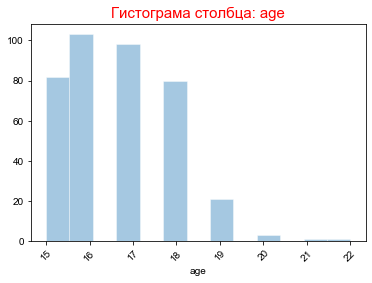

Статистика столбца: age


count    389.000000
mean      16.673522
std        1.265662
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

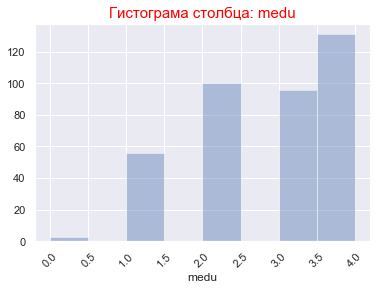

Статистика столбца: medu


count    386.000000
mean       2.766839
std        1.094277
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64

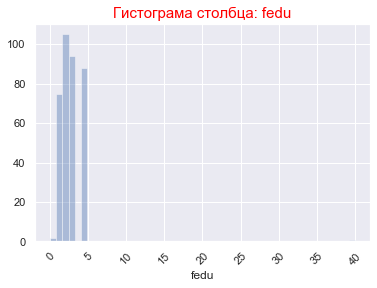

Статистика столбца: fedu


count    365.000000
mean       2.627397
std        2.241790
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max       40.000000
Name: fedu, dtype: float64

In [11]:
for i in number[:3]:
    gist(i)
    print(f'Статистика столбца: {i}')
    display(df[i].describe())

In [12]:
# Столбец age: Пропусков  и выбросов данных нет. Основная масса школьников в возрасте от 15 до 18 лет
# Столбец medu: Есть пропуски, выбросов данных нет. Основная масса матерей имеет образование 5-9 классов и выше

In [13]:
# Столбец fedu: Есть пропуски,есть выбросы(значения больше 4).Заменю их но пропуски

df['fedu'] = df.fedu.apply(lambda x: None if x > 4 else x)

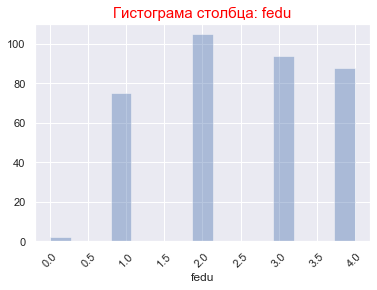

In [14]:
gist('fedu')

In [15]:
# Столбец fedu: образование отцов более равномерно распределены по групппам.
# Как и у матерей незначительное количество не имееет образования
# Большее количество матерей имеют высшее образование

## Следующие 4 группы


In [16]:
number[3:7]

['traveltime', 'studytime', 'failures', 'studytime_granular']

13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
15. failures — количество внеучебных неудач (n, ьесли 1<=n<=3, иначе 0)
16. studytime_granular - нет информации

In [17]:
# столбца 'studytime_granular' нет в описании к заданию, посмотрим как он выглядит совместно со столбцом studytime
df[['studytime_granular', 'studytime']].sample(5)

,studytime_granular,studytime
80,-3.0,1.0
155,-6.0,2.0
209,-12.0,4.0
152,-9.0,3.0
82,-6.0,2.0


In [18]:
# Подтвердим гипотизу, что каждому знвчению из столбца 'studytime_granular' соответствует значение из столбца 'studytime'
df.groupby(['studytime_granular'])['studytime'].unique()

studytime_granular
-12.0    [4.0]
-9.0     [3.0]
-6.0     [2.0]
-3.0     [1.0]
Name: studytime, dtype: object

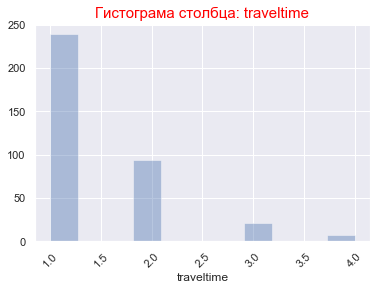

Статистика столбца: traveltime


count    361.000000
mean       1.434903
std        0.692660
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

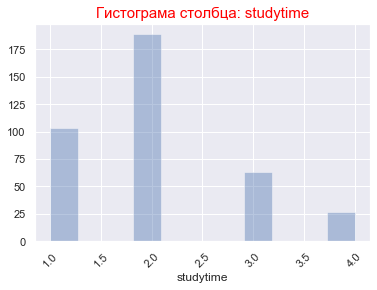

Статистика столбца: studytime


count    382.000000
mean       2.036649
std        0.847239
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

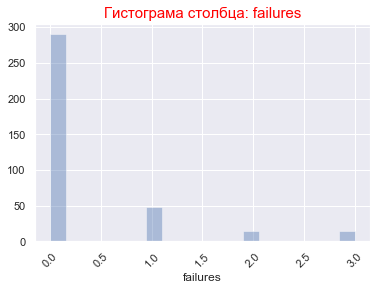

Статистика столбца: failures


count    367.000000
mean       0.326975
std        0.729479
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

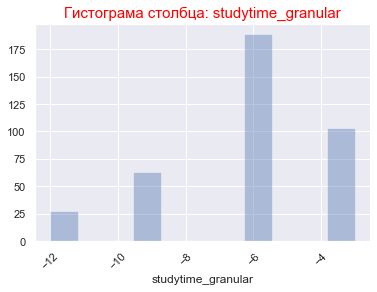

Статистика столбца: studytime_granular


count    382.000000
mean      -6.109948
std        2.541716
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime_granular, dtype: float64

In [19]:
for i in number[3:7]:
    gist(i)
    print(f'Статистика столбца: {i}')
    display(df[i].describe())

In [20]:
# Столбец traveltime — # Выбросы отсутвуют, есть пропуски данных. В основном школьники живут не далеко
# Столбец studytime — # Выбросы отсутвуют, есть пропуски данных. В среднем школьники тратят 2 часа на доп. занятия
# Столбец failures — # Выбросы отсутвуют, есть пропуски данных.
# Столбец studytime_granular - аналогичен studytime

## Следующие 3 группы

In [21]:
number[7:10]

['famrel', 'freetime', 'goout']

1. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
2. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
3. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

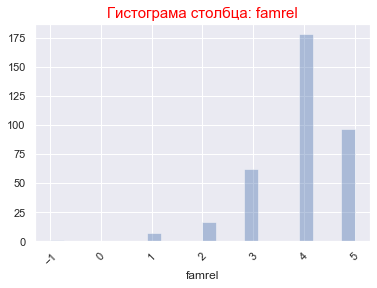

Статистика столбца: famrel


count    362.000000
mean       3.930939
std        0.931554
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

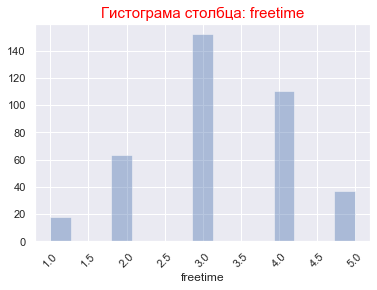

Статистика столбца: freetime


count    380.000000
mean       3.223684
std        0.993364
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

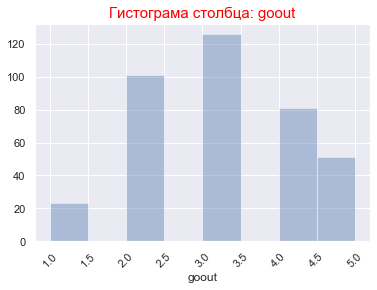

Статистика столбца: goout


count    382.000000
mean       3.094241
std        1.116104
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

In [22]:
for i in number[7:10]:
    gist(i)
    print(f'Статистика столбца: {i}')
    display(df[i].describe())

In [23]:
# Столбец famrel — # Есть пропуски,есть выбросы(значения меньше 0).Заменю их но пропуски.
# Семейные отношения в среднем оцениваются на 4
df['famrel'] = df.famrel.apply(lambda x: None if x < 0 else x)

In [24]:
# Столбец freetime — # Выбросы отсутвуют, есть пропуски данных. В среднем у школьнико есть свободное время
# Столбец goout — # Выбросы отсутвуют, есть пропуски данных. Очень похоже на характеристику свободного времени

## Следующие 3 группы

In [25]:
number[10:]

['health', 'absences', 'score']

27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
28. absences — количество пропущенных занятий
29. score — баллы по госэкзамену по математике

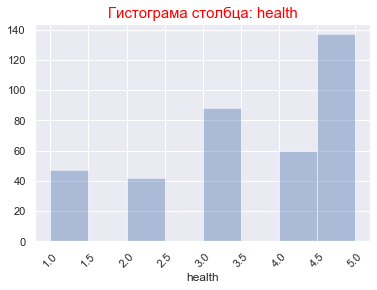

Статистика столбца: health


count    374.000000
mean       3.529412
std        1.402006
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

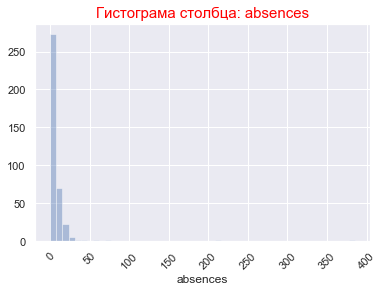

Статистика столбца: absences


count    378.000000
mean       7.320106
std       23.615525
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

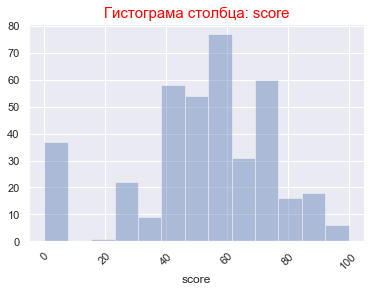

Статистика столбца: score


count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

In [26]:
for i in number[10:]:
    gist(i)
    print(f'Статистика столбца: {i}')
    display(df[i].describe())

In [27]:
# Столбец health — # Выбросы отсутвуют, есть пропуски данных. Здоровье школьников не идеально

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-24.0, 32.0].


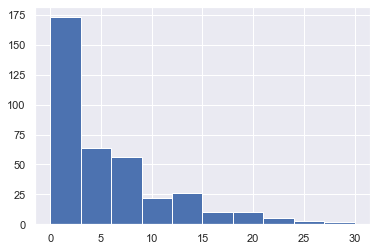

In [28]:
# Столбец absences — имеет выбросы. скорее всего большие значения связыны с жизнеными обстоятельтвами(н/р болезнь, переезд)
# и оценка будет связана с другими фактороми которые не учитываются в данной выборке.
# Воспользуюсь формулой интерквартильного расстояния (межквартильного размаха),  к = 3
IQR = df.absences.quantile(0.75) - df.absences.quantile(0.25)
perc25 = df.absences.quantile(0.25)
perc75 = df.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 3*IQR, l=perc75 + 3*IQR))
absences_IQR = df.absences.loc[df.absences.between(
    perc25 - 3*IQR, perc75 + 3*IQR)]
absences_IQR.hist()

In [29]:
# заменю выбросы пропущенными значениями
df['absences'] = df.absences.apply(
    lambda x: None if x not in set(absences_IQR) else x)

In [30]:
# Столбец score — # Выбросы отсутвуют

In [31]:
# Построю матрицу корреляции числовых признаков

In [32]:
corr = df.corr()
cmap = sns.diverging_palette(5, 250, as_cmap=True)


def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
            ]


corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,age,medu,fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
age,1.00,-0.15,-0.15,0.07,-0.02,0.21,0.02,0.05,0.02,0.12,-0.07,0.16,-0.16
medu,-0.15,1.00,0.63,-0.17,0.08,-0.24,-0.08,-0.01,0.04,0.07,-0.05,0.11,0.21
fedu,-0.15,0.63,1.00,-0.14,0.01,-0.27,-0.01,-0.03,-0.01,0.05,0.02,0.02,0.13
traveltime,0.07,-0.17,-0.14,1.00,-0.11,0.05,0.11,-0.04,-0.03,0.03,-0.01,-0.02,-0.07
studytime,-0.02,0.08,0.01,-0.11,1.00,-0.18,-1.00,0.03,-0.13,-0.05,-0.08,-0.09,0.12
failures,0.21,-0.24,-0.27,0.05,-0.18,1.00,0.18,0.00,0.09,0.11,0.09,0.10,-0.34
studytime_granular,0.02,-0.08,-0.01,0.11,-1.00,0.18,1.00,-0.03,0.13,0.05,0.08,0.09,-0.12
famrel,0.05,-0.01,-0.03,-0.04,0.03,0.00,-0.03,1.00,0.16,0.06,0.10,-0.09,0.05
freetime,0.02,0.04,-0.01,-0.03,-0.13,0.09,0.13,0.16,1.00,0.30,0.06,0.03,0.02
goout,0.12,0.07,0.05,0.03,-0.05,0.11,0.05,0.06,0.30,1.00,-0.02,0.12,-0.13



Самая большая зависимость между столбцами failures, medu и целевой переменой

Чем больше внеучебных неудач тем меньше оценка

Можно предположить, что более образованные матери понимают важность образования и влияют на мотивацию получать высокую оценку детей (о том что гены(уровень интеллекта родителей) играют меньшую роль говорит слабая корреляция между  score и fedu при высокой между fedu и medu)

Самая минимальная зависимость score от freetime. При этом существует относительно небольшая зависимость между свободным временем после школы и проведением временем с друзьями, что говорит о том, что школьники в свободное время занимаются, чем-то другим, а не общением с друзьями. Большее количество времени, уделенное друзьям, отрицательно влияет на оценки.

Как и предполагалось столбцы studytime и studytime_granular индентичны. Так как у них одинаковая корреляция с целевой переменной нет разницы какой столбец нужно удалить. Удаляю studytime_granular.


In [33]:
df.drop(['studytime_granular'], axis=1, inplace=True)

In [34]:
#sns.pairplot(df, kind = 'reg')

## Категориальные переменные

In [35]:
# Функция для получения информации о столбцах с категориальными переменными
def value(column):
    display(pd.DataFrame(df[column].value_counts()))
    print("Значений, встретившихся в столбце более 5 раз:",
          (df[column].value_counts() > 5).sum())
    print("Уникальных значений:", df[column].nunique())
    print("Количество пропущенных значений:", df[column].isna().sum())
    #df.loc[:, [column]].info()
    df[column]

In [36]:
# Вывод информации по столбцам
for col in category:
    value(col)

,school
GP,344
MS,45


Значений, встретившихся в столбце более 5 раз: 2
Уникальных значений: 2
Количество пропущенных значений: 0


,sex
F,204
M,185


Значений, встретившихся в столбце более 5 раз: 2
Уникальных значений: 2
Количество пропущенных значений: 0


,address
U,291
R,83


Значений, встретившихся в столбце более 5 раз: 2
Уникальных значений: 2
Количество пропущенных значений: 15


,famsize
GT3,255
LE3,107


Значений, встретившихся в столбце более 5 раз: 2
Уникальных значений: 2
Количество пропущенных значений: 27


,pstatus
T,308
A,36


Значений, встретившихся в столбце более 5 раз: 2
Уникальных значений: 2
Количество пропущенных значений: 45


,mjob
other,127
services,98
at_home,58
teacher,55
health,32


Значений, встретившихся в столбце более 5 раз: 5
Уникальных значений: 5
Количество пропущенных значений: 19


,fjob
other,194
services,99
teacher,29
at_home,16
health,15


Значений, встретившихся в столбце более 5 раз: 5
Уникальных значений: 5
Количество пропущенных значений: 36


,reason
course,135
reputation,102
home,101
other,34


Значений, встретившихся в столбце более 5 раз: 4
Уникальных значений: 4
Количество пропущенных значений: 17


,guardian
mother,248
father,86
other,24


Значений, встретившихся в столбце более 5 раз: 3
Уникальных значений: 3
Количество пропущенных значений: 31


,schoolsup
no,331
yes,49


Значений, встретившихся в столбце более 5 раз: 2
Уникальных значений: 2
Количество пропущенных значений: 9


,famsup
yes,216
no,135


Значений, встретившихся в столбце более 5 раз: 2
Уникальных значений: 2
Количество пропущенных значений: 38


,paid
no,197
yes,153


Значений, встретившихся в столбце более 5 раз: 2
Уникальных значений: 2
Количество пропущенных значений: 39


,activities
yes,192
no,183


Значений, встретившихся в столбце более 5 раз: 2
Уникальных значений: 2
Количество пропущенных значений: 14


,nursery
yes,297
no,77


Значений, встретившихся в столбце более 5 раз: 2
Уникальных значений: 2
Количество пропущенных значений: 15


,higher
yes,350
no,19


Значений, встретившихся в столбце более 5 раз: 2
Уникальных значений: 2
Количество пропущенных значений: 20


,internet
yes,300
no,55


Значений, встретившихся в столбце более 5 раз: 2
Уникальных значений: 2
Количество пропущенных значений: 34


,romantic
no,235
yes,123


Значений, встретившихся в столбце более 5 раз: 2
Уникальных значений: 2
Количество пропущенных значений: 31


В данных нет пропусков, которые не обработаны. Почти в каждом столбце есть пропуски.
В данных есть информация по двум школам. Учитывая одинаковый порядок столбцов school и address можно проверить гипотезу о их взаимосвязи. 


In [37]:
df.groupby(['school']).address.value_counts()

school  address
GP      U          273
        R           60
MS      R           23
        U           18
Name: address, dtype: int64

In [38]:
# Нет четкого различия.
# Гипотеза о том, что одна школа находится в городе, а другая за городом не верна

In [39]:
# Посмотрим на box-plot столбцов от score

In [40]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=df,
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

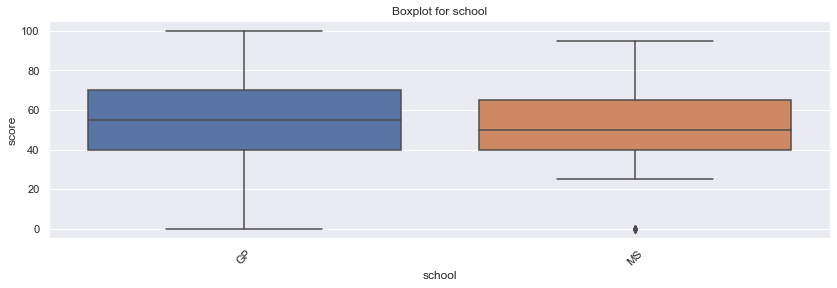

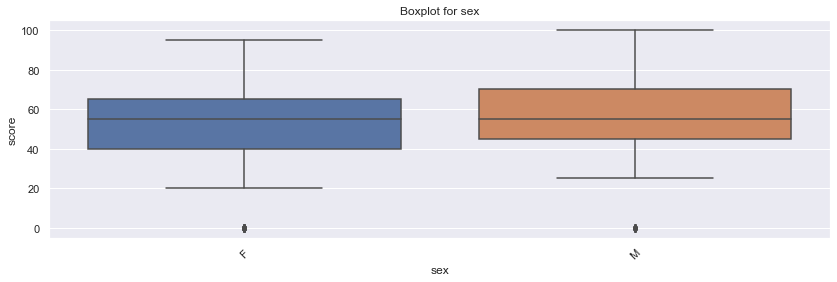

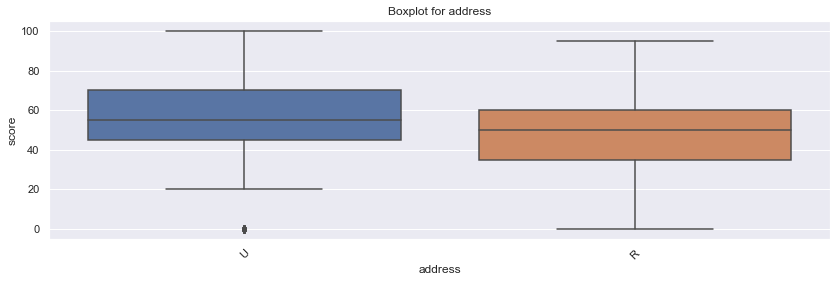

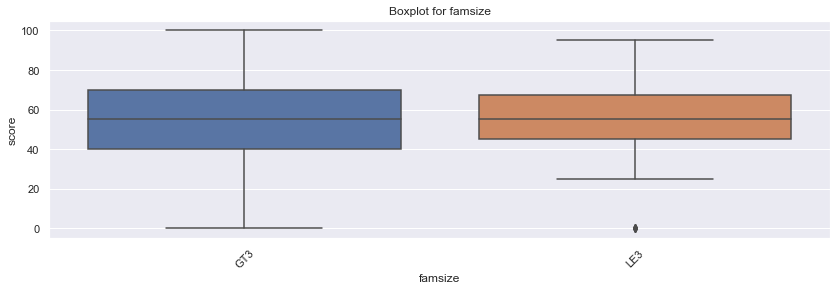

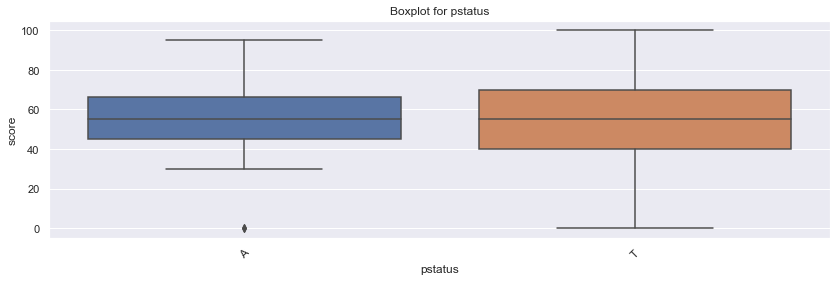

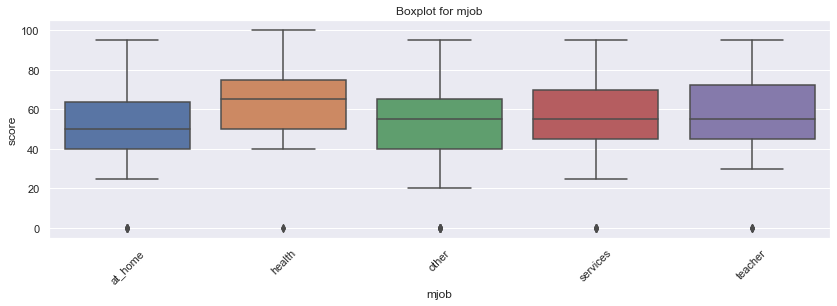

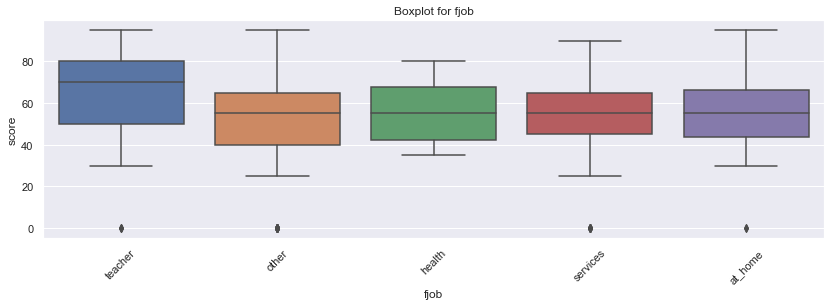

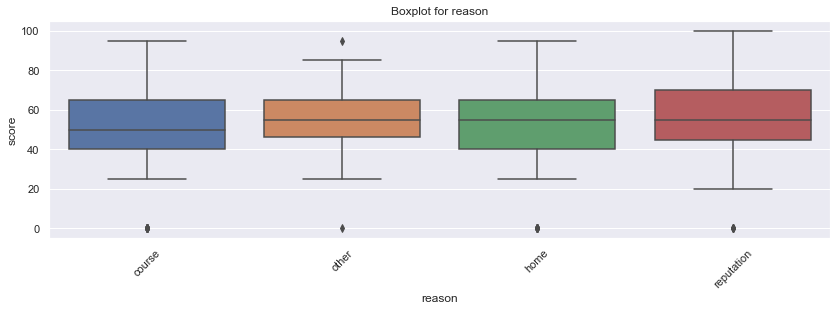

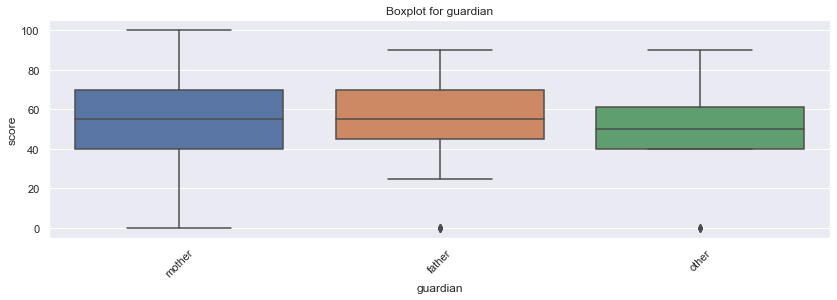

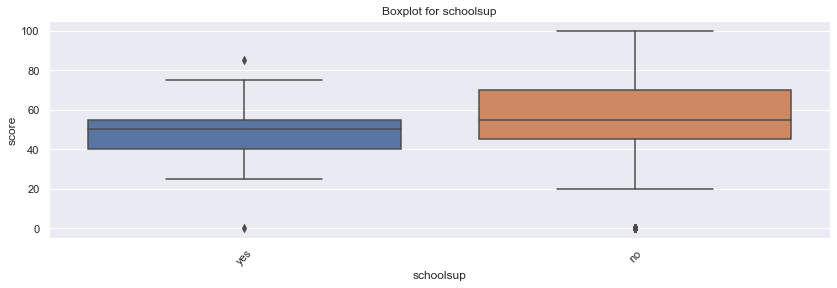

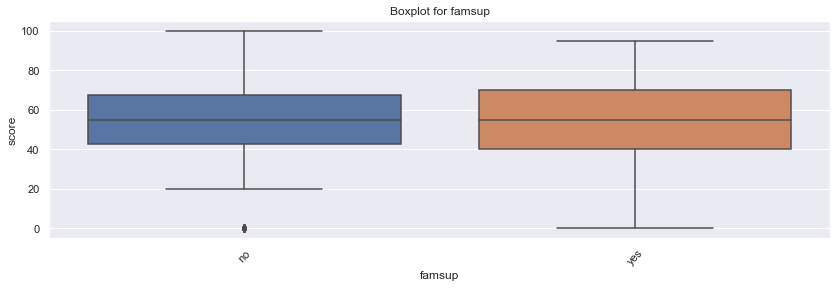

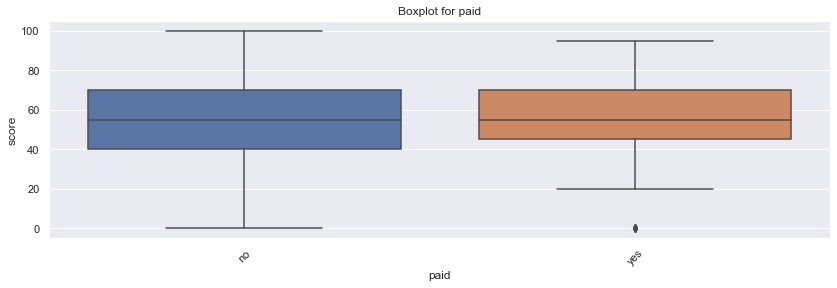

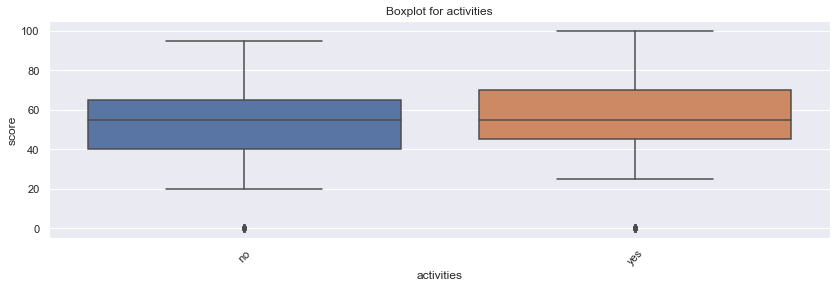

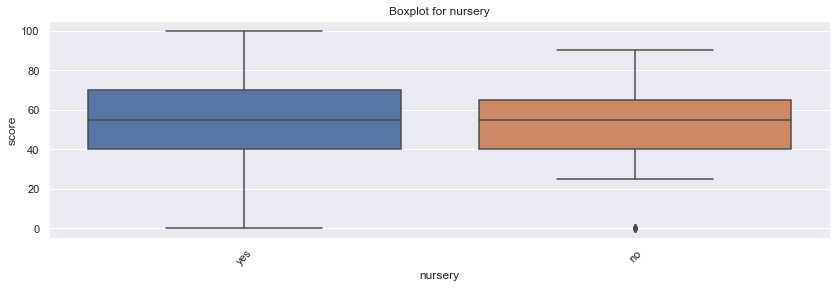

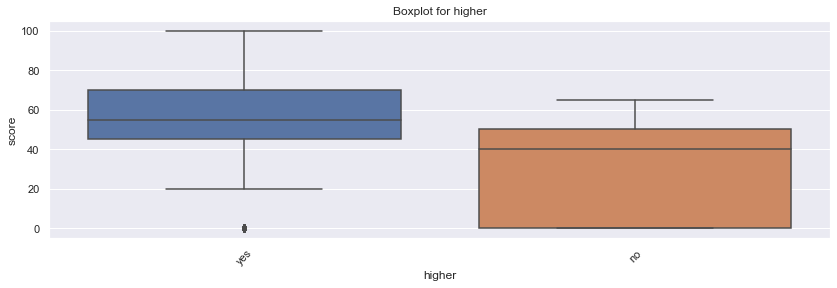

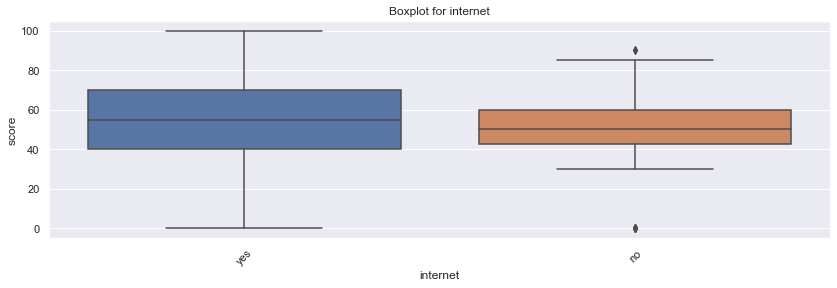

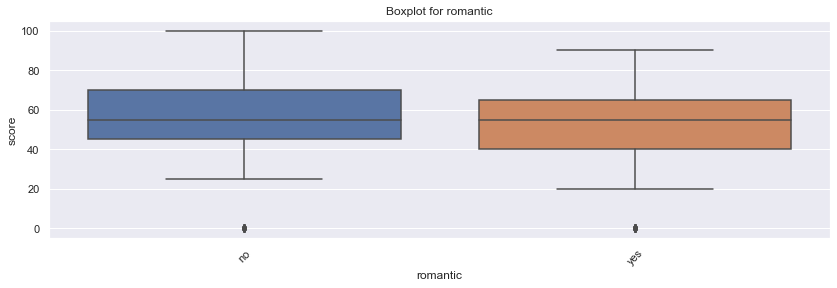

In [41]:
for col in category:
    get_boxplot(col)

In [42]:
# Проверим, есть ли статистическая разница в распределении оценок по категориальным  признакам, с помощью теста Стьюдента.
# Проверим нулевую гипотезу о том, что распределения оценок по математике по различным параметрам неразличимы:
def get_stat_dif(column):
    cols = df[df[column].isnull() == False][column].unique()
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'],
                     df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.1/len(combinations_all):  # Учли поправку Бонферони c коэффициентом значимости 0.1
            print('Найдены статистически значимые различия для колонки', column)
            return True
            
    return False

In [44]:
valuable = []
for col in category:
    result = get_stat_dif(col)
    if result:
        valuable.append(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


Тест Стьюдента дал результаты сопоставимые с box-plot(для этого пришлось увеличить коэффициент значимости и притвориться, что данные имеют нормальное распределение)

Интересно, что важна работа матери и не важна работа отца

In [45]:
# Список важных категориальных переменных
valuable

['sex', 'address', 'mjob', 'schoolsup', 'paid', 'higher', 'romantic']

In [46]:
# Запущу ячейку еще раз, для получения измененного списка number(числовые переменные)
# Сделаю список столбцов по типам данных
number = []
category = []
for im in df.columns:
    if df[im].dtypes == 'object':
        category.append(im)
    else:
        number.append(im)

In [47]:
# Сформирую новый датасет
df = df[valuable + number]
df

,sex,address,mjob,schoolsup,paid,higher,romantic,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
0,F,U,at_home,yes,no,yes,no,18,4.0,4.0,2.0,2.0,0.0,4.0,3.0,4.0,3.0,6.0,30.0
1,F,U,at_home,no,no,yes,no,17,1.0,1.0,1.0,2.0,0.0,5.0,3.0,3.0,3.0,4.0,30.0
2,F,U,at_home,yes,NaN,yes,NaN,15,1.0,1.0,1.0,2.0,3.0,4.0,3.0,2.0,3.0,10.0,50.0
3,F,U,health,no,yes,yes,yes,15,4.0,2.0,1.0,3.0,0.0,3.0,2.0,2.0,5.0,2.0,75.0
4,F,U,other,no,yes,yes,no,16,3.0,3.0,1.0,2.0,0.0,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,M,U,services,no,yes,yes,no,20,2.0,2.0,1.0,2.0,2.0,5.0,5.0,4.0,4.0,NaN,45.0
385,M,U,services,no,no,yes,no,17,3.0,1.0,2.0,1.0,0.0,2.0,4.0,5.0,2.0,3.0,80.0
386,M,R,other,NaN,no,NaN,no,21,1.0,1.0,1.0,1.0,3.0,5.0,5.0,3.0,3.0,3.0,35.0
387,M,R,services,no,no,yes,no,18,3.0,2.0,3.0,1.0,0.0,4.0,4.0,1.0,5.0,0.0,50.0


### Выводы

Очень мало наблюдений, что не позволяет качественно заполнить пропуски.
В результате предобработки из 30 столбцов осталось 19.

Главный значимый числовой признак - количество внеучебных неудач. Чем больше неудач, тем хуже оценка.

В получении положительных оценок важно образование матери и характер ее работы. И не очень важно образование отца и характер его работы.

Мотивация школьников в получении высшего образования сильно влияет на хорошие оценки.

Чем больше возраст, тем хуже оценка. школьники с большим возвратом скорее всего не усваивали школьную программы вовремя и оставались на второй год.
